### TP Détecteur de parole V1.0 ###
Scherrer Arthur, Mahouin Julien, Alexis Noliere, Nicolas Tachet



## Importation des librairies

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io.wavfile as sio
from sklearn.mixture import GaussianMixture

## Importation du fichier audio
On importe le fichier audio avec la librairie scipy.io.wavfile. On récupère le taux d'échantillonnage et le signal audio ainsi que ça durée.

In [28]:
sample,test = sio.read('test_2.wav')
print("Nombre d'échantillon par seconde", sample)
print("Nombre d'échantillon total",len(test))

# On cherche le temps en seconde du fichier audio
temps_seconde = len(test)/sample
print("Le temps du fichiers audio en seconde est de : ",temps_seconde)


Nombre d'échantillon par seconde 16000
Nombre d'échantillon total 57489603
Le temps du fichiers audio en seconde est de :  3593.1001875


On divise le signal audio par des fenêtre de 30ms avec un pas de 10 ms. 

In [29]:
#On divise le signal en fenêtre de 30ms
fenetre =30
fenetre_echantillon = int(fenetre*sample/1000)
print("Le nombre d'échantillon par fenêtre est de : ",fenetre_echantillon)

#On en déduit le nombre de fenêtre
nb_fenetre = int(len(test)/fenetre_echantillon)
print("Le nombre de fenêtre est de : ",nb_fenetre)

Le nombre d'échantillon par fenêtre est de :  480
Le nombre de fenêtre est de :  119770


La matrice est de dimension :  (119770, 480)
L'énergie totale de la matrice est de :  [18.3501931  19.75342678 18.57448836 ... 18.56318498 18.94371868
 18.6764075 ]


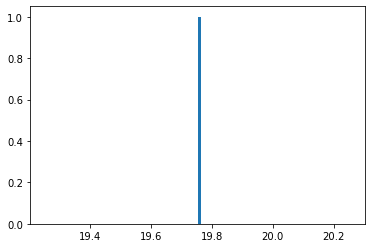

In [42]:
#On convertie le tableau en matrice avec strid avec 160 colonnes
matrice = np.lib.stride_tricks.as_strided(test, shape=(nb_fenetre, fenetre_echantillon), strides=(test.strides[0]*fenetre_echantillon, test.strides[0]))
print("La matrice est de dimension : ",matrice.shape)

#Calcul de l'énergie totale de la matrice
energie_test = np.sum(np.array(matrice, dtype='int64')**2,axis=1)
#Si l'energie est égale a 0 on le remplace par 1
energie_test[energie_test==0]=1
energie = np.log((energie_test))
print("L'énergie totale de la matrice est de : ",energie)

#historgramme de l'énergie
plt.hist(energie, bins=100)
plt.show()


### Question 3

À combien d’échantillons correspondent respectivement 30 et 10 ms ?

10 ms = 160, 30 ms = 480

# Étape 2 - Apprendre un GMM

In [41]:
# Distribution 1
x1 = np.random.normal(0, 1, 1000)
y1 = np.random.normal(0, 1, 1000)

# Distribution 2
x2 = np.random.normal(5, 1, 1000)
y2 = np.random.normal(5, 1, 1000)

# Création du modèle par concaténation
X = np.concatenate((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T), axis=0)

print(X)

[[-0.14670681 -1.14461485]
 [ 0.45009513  0.69902894]
 [ 0.17373795 -1.4077317 ]
 ...
 [ 6.18521643  4.6033433 ]
 [ 4.80102567  5.96162749]
 [ 3.67041828  3.90146292]]


Création de l'objet GMM

In [32]:
gmm = GaussianMixture(n_components = 3, verbose = 10, max_iter = 10)
gmm.fit(X)

Initialization 0
Initialization converged: True	 time lapse 0.02006s	 ll -3.49106


GaussianMixture(max_iter=10, n_components=3, verbose=10)

Classe des nouvelles données

In [43]:
new_data = np.array([[0, 0], [5, 5]])
labels = gmm.predict(new_data)
print(labels)

[1 0]


Visualisation des résultats

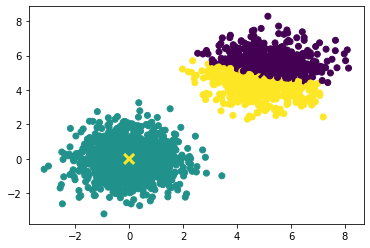

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X))
plt.scatter(new_data[:, 0], new_data[:, 1], c=labels, marker='x', s=100, linewidths=3)
plt.show()

### Question 5
quelle sera la dimension des gaussiennes ?
-> univariées
### Question 6
quelle est la méthode d'initialisation du modèle ?
-> np.concatenate() ?